In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score

sns.set()

# Displays all columns and rows in data
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# Linear regression_model
from sklearn.linear_model import LinearRegression

# Libraries for Model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('online_shoppers_intention_given.csv') #import data

In [3]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:
df.info() #view column details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.isna().sum() #check for missing data 

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
for i in df.columns:
    print(i, df[i].nunique()) #distinct values in each column of the dataset

Administrative 27
Administrative_Duration 3335
Informational 17
Informational_Duration 1258
ProductRelated 311
ProductRelated_Duration 9551
BounceRates 1872
ExitRates 4777
PageValues 2704
SpecialDay 6
Month 10
OperatingSystems 8
Browser 13
Region 9
TrafficType 20
VisitorType 3
Weekend 2
Revenue 2


# weekend engagement

<AxesSubplot:xlabel='Month'>

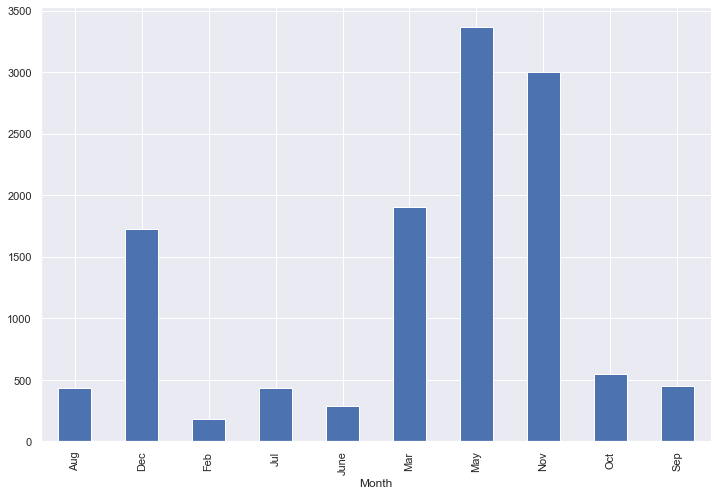

In [7]:
df.groupby('Month').count()['Weekend'].plot(kind = 'bar', figsize = (12,8))
#month with the highest weekend engagement is May

In [8]:
df.groupby(['Month', 'Weekend']).count()['Revenue']

Month  Weekend
Aug    False       337
       True         96
Dec    False      1361
       True        366
Feb    False       156
       True         28
Jul    False       328
       True        104
June   False       241
       True         47
Mar    False      1426
       True        481
May    False      2649
       True        715
Nov    False      2207
       True        791
Oct    False       405
       True        144
Sep    False       352
       True         96
Name: Revenue, dtype: int64

<AxesSubplot:xlabel='Weekend,Month'>

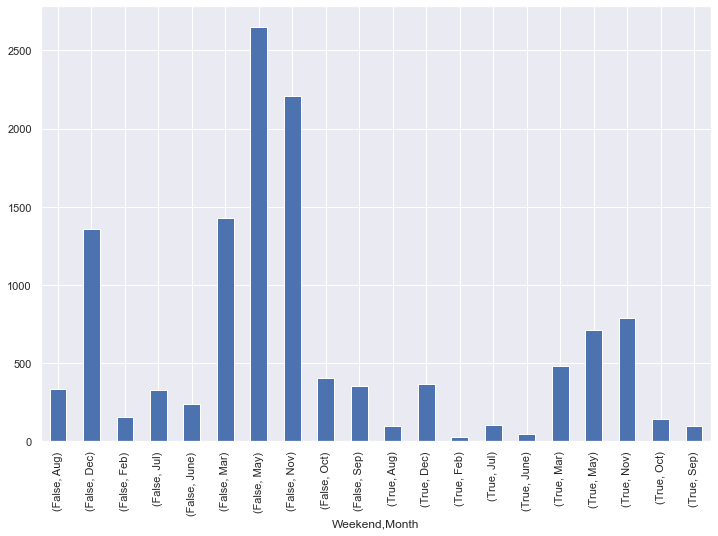

In [9]:
df.groupby(['Weekend', 'Month']).count()['Revenue'].plot(kind = 'bar', figsize = (12,8))

# revenue

<AxesSubplot:xlabel='Month'>

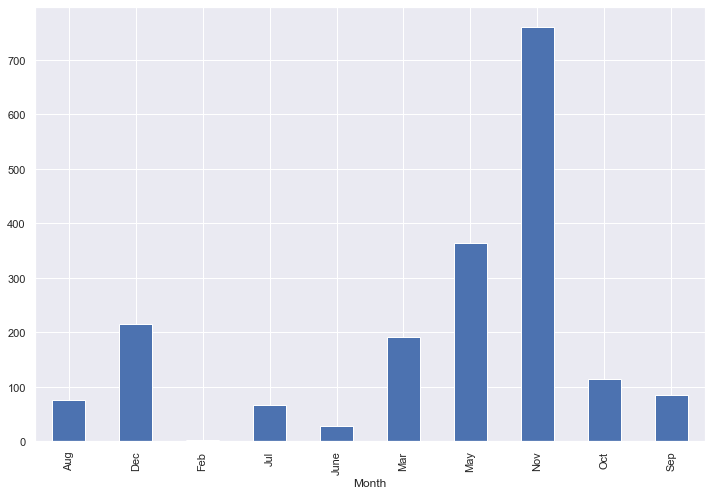

In [10]:
df.groupby('Month').sum()['Revenue'].plot(kind = 'bar', figsize = (12,8))

In [11]:
df.groupby('Month').sum()['Revenue']

Month
Aug      76
Dec     216
Feb       3
Jul      66
June     29
Mar     192
May     365
Nov     760
Oct     115
Sep      86
Name: Revenue, dtype: int64

+ November Generated the most Revenue of 760 points, based on the weekdays.
Customers Weekends do not have any relevant impact on the website revenue 

# bounce rate and exit rate

In [12]:
df.groupby('Month').sum()['ExitRates']

Month
Aug      16.335648
Dec      71.329893
Feb      13.643285
Jul      19.582716
June     16.773806
Mar      85.051385
May     164.329829
Nov     114.530192
Oct      15.927259
Sep      13.583583
Name: ExitRates, dtype: float64

In [13]:
df.groupby('Month').sum()['BounceRates']

Month
Aug      7.885283
Dec     34.797567
Feb      8.651934
Jul     10.660237
June    10.109304
Mar     41.434902
May     90.379267
Nov     57.737874
Oct      6.505344
Sep      5.458009
Name: BounceRates, dtype: float64

In [14]:
month = [city for city, df in df.groupby(['Month'])]

In [15]:
month

['Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep']

C:\Users\ojoho\AppData\Local\Temp\ipykernel_8708\3256560754.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(month, rotation='vertical', size=8)
C:\Users\ojoho\AppData\Local\Temp\ipykernel_8708\3256560754.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


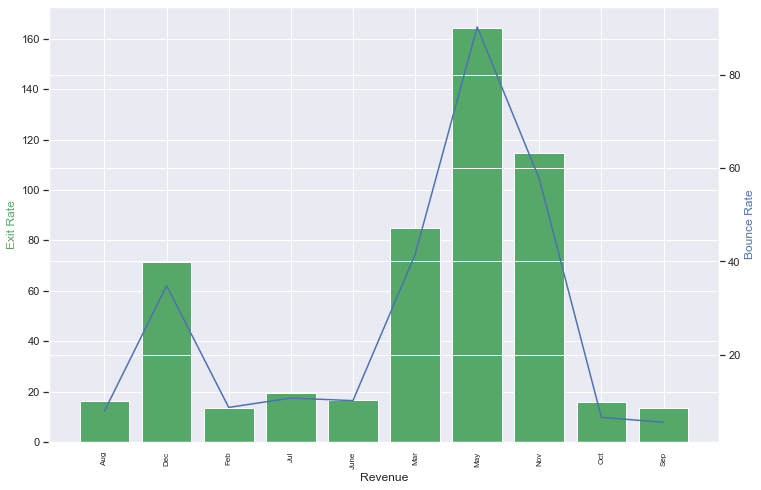

In [16]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

exit = df.groupby('Month').sum()['ExitRates']
bounce = df.groupby('Month').sum()['BounceRates']
month = [city for city, df in df.groupby(['Month'])]



fig, ax1 = plt.subplots(figsize=(12,8))
ax1.bar(month, exit, color='g')
ax2 = ax1.twinx()

ax2.plot(month, bounce, color='b')

ax1.set_xlabel('Revenue')
ax1.set_ylabel('Exit Rate', color='g')
ax2.set_ylabel('Bounce Rate', color='b')
ax1.set_xticklabels(month, rotation='vertical', size=8)

fig.show()

##### Bounce Rate:
Bounce rate is a metric that indicates the percentage of visitors who enter a website and then leave without taking any further action or navigating to any other page on the site. In other words, it measures the proportion of single-page visits. A high bounce rate generally indicates that visitors are not engaging with the website content or are not finding what they are looking for.

##### Exit Rate:
Exit rate, on the other hand, represents the percentage of visitors who exit the website from a particular page. It indicates the proportion of visits in which a specific page was the last one viewed before the visitor left the site. Exit rate considers visitors who may have visited multiple pages on the site before leaving.

###### Proportionality between Bounce Rate and Exit Rate:
The bounce rate and exit rate are very proportional. Bounce rate focuses on the first interaction or landing page, while exit rate considers any page within the user's journey on the site, very few people stay on the website after interacting with the first page  


# admin pages

In [17]:
df.columns #view columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

<AxesSubplot:xlabel='Administrative'>

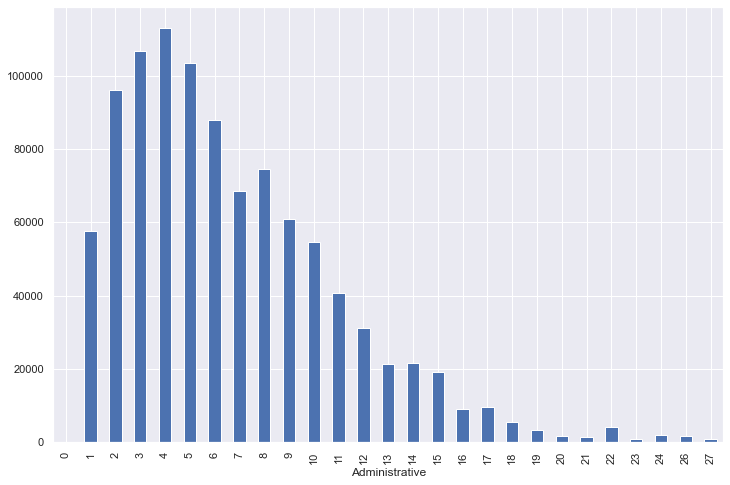

In [18]:
df.groupby('Administrative').sum()['Administrative_Duration'].plot(kind = 'bar', figsize = (12,8))

+ Based on the information above. adminstrative pages 4, 3, 5, get the most views on the website.

# informational pages

<AxesSubplot:xlabel='Informational'>

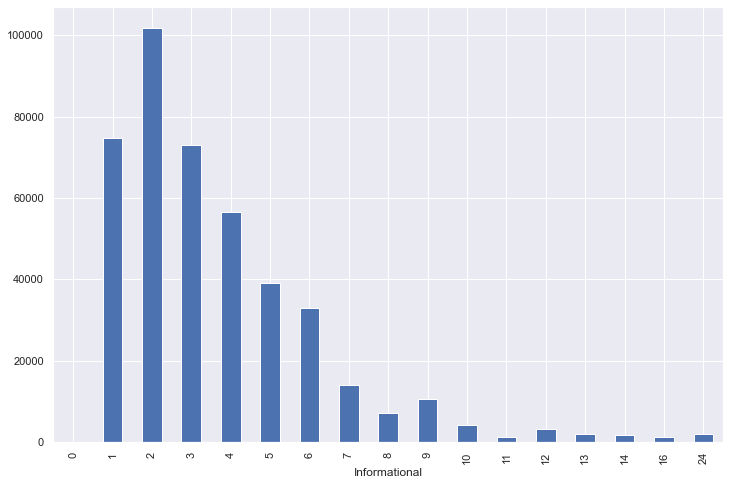

In [19]:
df.groupby('Informational').sum()['Informational_Duration'].plot(kind = 'bar', figsize = (12,8))

+ Informational content on page 2 appears to be the most engaging on the website

# product pages

<AxesSubplot:xlabel='ProductRelated'>

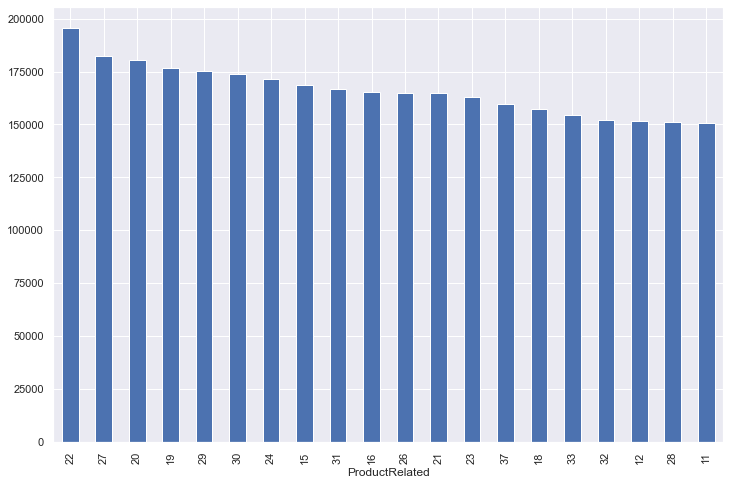

In [20]:
df.groupby('ProductRelated').sum()['ProductRelated_Duration'].sort_values(ascending = False)[:20].plot(kind = 'bar', figsize = (12,8))

+ The top 20 pages on product related items that gained the most attraction based on their viewership

# effect of special days

In [21]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

<AxesSubplot:xlabel='SpecialDay'>

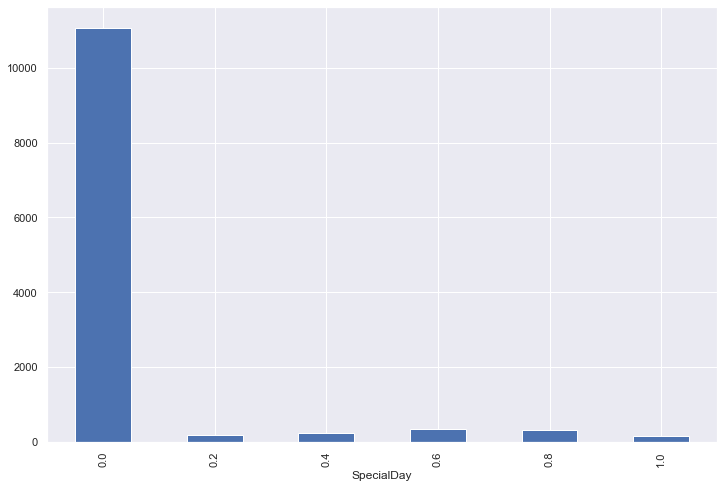

In [22]:
df.groupby('SpecialDay').count()['Revenue'].plot(kind = 'bar', figsize = (12,8))

In [23]:
df.groupby('SpecialDay').count()['Revenue']

SpecialDay
0.0    11079
0.2      178
0.4      243
0.6      351
0.8      325
1.0      154
Name: Revenue, dtype: int64

In [24]:
df.groupby('Month').sum()['SpecialDay']

Month
Aug       0.0
Dec       0.0
Feb      43.0
Jul       0.0
June      0.0
Mar       0.0
May     714.4
Nov       0.0
Oct       0.0
Sep       0.0
Name: SpecialDay, dtype: float64

We do not notice any significant effect of special days in generating revenue, but we do notice higher click rates in february and may which may be attributed to Valentine's and Children's Day

### New Visitor

In [25]:
df['VisitorType'].unique() # new visitor against month

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [26]:
new_visitor = df[df['VisitorType'] == 'New_Visitor']

In [27]:
new_visitor

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
93,0,0.000,0,0.0,13,649.250000,0.000000,0.015385,0.000000,0.0,Feb,2,2,1,5,New_Visitor,False,False
196,2,56.000,1,144.0,67,2563.783333,0.000000,0.005797,19.342650,0.0,Mar,2,2,4,2,New_Visitor,False,True
198,0,0.000,0,0.0,17,840.233333,0.000000,0.001667,109.176000,0.0,Mar,2,2,9,2,New_Visitor,False,True
199,3,94.000,2,125.0,55,1970.844805,0.000000,0.001724,96.255116,0.0,Mar,2,4,1,2,New_Visitor,True,True
202,5,218.000,0,0.0,13,284.500000,0.000000,0.004167,0.000000,0.0,Mar,1,1,1,2,New_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12276,7,139.575,0,0.0,30,986.500000,0.000000,0.011429,36.392861,0.0,Dec,2,10,1,2,New_Visitor,False,True
12296,0,0.000,0,0.0,5,108.000000,0.000000,0.040000,0.000000,0.0,Dec,2,2,1,2,New_Visitor,False,False
12297,0,0.000,0,0.0,6,139.750000,0.033333,0.066667,0.000000,0.0,Nov,2,2,3,2,New_Visitor,False,False
12317,3,100.500,0,0.0,95,1453.640882,0.002105,0.012761,0.000000,0.0,Dec,2,2,3,2,New_Visitor,False,False


In [28]:
new_visitor['Month'].value_counts()

Nov     419
Dec     335
May     319
Mar     232
Oct     124
Sep     108
Aug      72
Jul      54
June     30
Feb       1
Name: Month, dtype: int64

<AxesSubplot:>

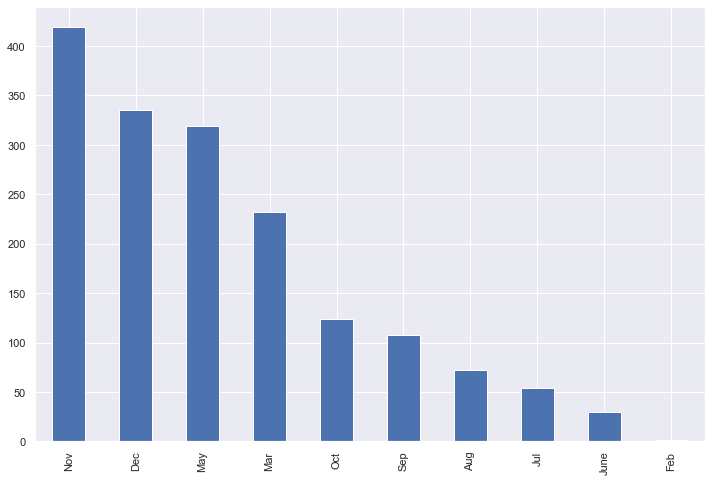

In [29]:
new_visitor['Month'].value_counts().plot(kind = 'bar', figsize = (12,8))

+ In the month of november the website recorded the highest amount of new users, which is also the month the highest revenue isgenerated

# sum of all numerical entries grouped by the months to notice trends

In [30]:
df.groupby(['Month']).sum().T

Month,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
Administrative,1358.000000,3.793000e+03,100.000000,1047.000000,655.000000,3.600000e+03,6.610000e+03,7.847000e+03,2042.000000,1494.000000
Administrative_Duration,46208.585717,1.357991e+05,3104.525000,34073.722728,17029.424392,1.358385e+05,2.337031e+05,2.726181e+05,69140.700580,48977.792121
Informational,235.000000,8.850000e+02,16.000000,223.000000,162.000000,8.020000e+02,1.426000e+03,1.938000e+03,268.000000,254.000000
Informational_Duration,15377.720000,6.574578e+04,439.000000,19664.816667,5889.823333,5.849487e+04,9.137687e+04,1.308175e+05,21228.142381,16010.101905
ProductRelated,16566.000000,4.834700e+04,2058.000000,15728.000000,10387.000000,3.777500e+04,8.910500e+04,1.380240e+05,18428.000000,14831.000000
ProductRelated_Duration,551059.032319,1.919510e+06,86666.695097,526004.940243,349452.749966,1.549024e+06,3.303088e+06,5.271677e+06,613220.748787,561517.891292
BounceRates,7.885283,3.479757e+01,8.651934,10.660237,10.109304,4.143490e+01,9.037927e+01,5.773787e+01,6.505344,5.458009
ExitRates,16.335648,7.132989e+01,13.643285,19.582716,16.773806,8.505138e+01,1.643298e+02,1.145302e+02,15.927259,13.583583
PageValues,2571.184257,1.180101e+04,163.826743,1773.106673,976.734639,7.551113e+03,1.827181e+04,2.137388e+04,4746.423532,3385.457907
SpecialDay,0.000000,0.000000e+00,43.000000,0.000000,0.000000,0.000000e+00,7.144000e+02,0.000000e+00,0.000000,0.000000


# Data Modelling and Feature Engineering

In [31]:
month_vals = {'Jan': 1,
             'Feb' : 2,
             'Mar' : 3,
             'Apr' : 4,
             'May' : 5,
             'Jun' : 6,
             'June' : 6,
             'Jul' : 7,
             'Aug' : 8,
             'Sep' : 9,
             'Oct' : 10,
             'Nov' : 11,
             'Dec' : 12}

In [32]:
df['New_Month'] = df['Month'].replace(month_vals)

In [33]:
vis_vals = {'Returning_Visitor' : 0, 'New_Visitor' : 1, 'Other' : 2}

In [34]:
df['Visitor'] = df['VisitorType'].replace(vis_vals)

# correlation matrix

<AxesSubplot:>

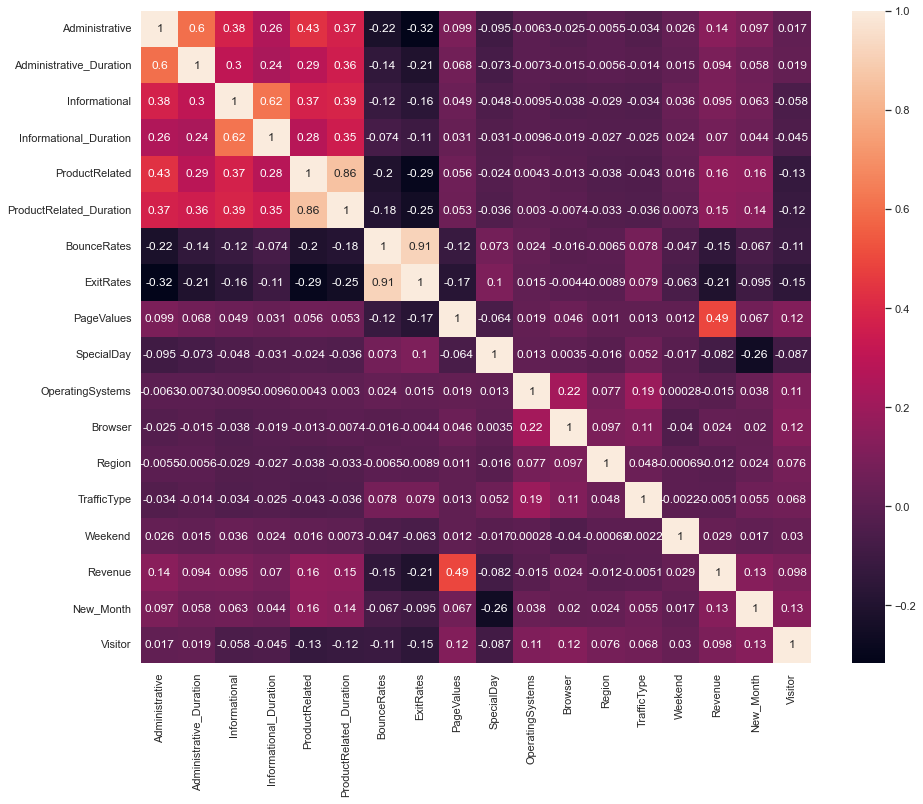

In [35]:
coor = df.corr()
features = coor.index
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(df[features].corr(), annot = True)

correlated columns
+ bounce rate and exit rates
+ revenue and page value
+ product related and product related duration

### sequential feature selector

In [36]:
# defining the variables
X = df.drop(["Revenue", 'Month', 'VisitorType'], axis=1)
y = df["Revenue"]

In [37]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [38]:
# fitting the linear model
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [39]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    verbose=2,
    n_jobs=-1,  # this will ensure all CPU cores are being used for computation
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    2.2s finished

[2023-06-08 15:38:37] Features: 1/17 -- score: 0.24786150540648752[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.2s finished

[2023-06-08 15:38:38] Features: 2/17 -- score: 0.26314480174872923[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.2s finished

[2023-06-08 15:38:38] Features: 3/17 -- score: 0.27099698113054366[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.2s finished

[2023-06-08 15:38:38] Features: 4/17 -- score: 0.27556705442279583[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.2s remain

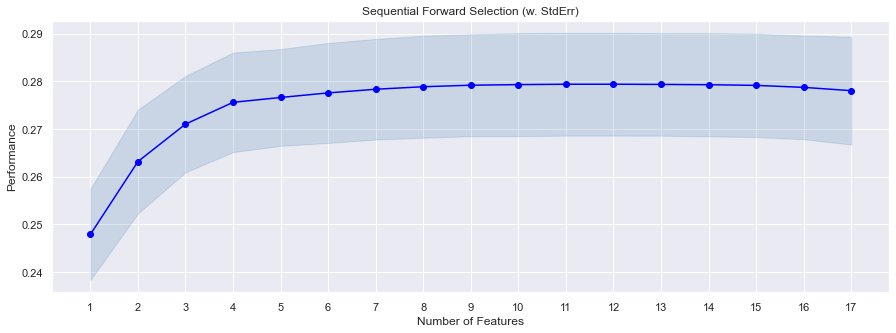

In [40]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.show()

In [41]:
reg = LinearRegression()

# # Build step forward feature selection
sfs = SFS(
    reg,
    k_features=4,
    forward=True,
    floating=False,
    scoring="r2",
    verbose=2,
    cv=5,
    n_jobs=-1,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  17 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.2s finished

[2023-06-08 15:38:42] Features: 1/4 -- score: 0.24786150540648752[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.1s finished

[2023-06-08 15:38:43] Features: 2/4 -- score: 0.26314480174872923[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.3s finished

[2023-06-08 15:38:43] Features: 3/4 -- score: 0.27099698113054366[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.4s finished

[2023-06-08 15:38:43] Features: 4/4 -- score: 0.27556705442279583

In [42]:
# important features
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[4, 7, 8, 15]


In [43]:
x_train.columns[feat_cols]

Index(['ProductRelated', 'ExitRates', 'PageValues', 'New_Month'], dtype='object')

### Using Random Forest feature selection

In [44]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


# Fit the random forest classifier for feature selection
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

# Create a SelectFromModel object
sfm = SelectFromModel(clf, prefit=True)

# Get the boolean mask of selected features
mask = sfm.get_support()

# Get the names of the selected columns
selected_columns = x_train.columns[mask]

print(selected_columns)

Index(['ProductRelated', 'ProductRelated_Duration', 'ExitRates', 'PageValues'], dtype='object')


+ Using SFS, the important features selected as the reason to determine revenue generation were: 'ProductRelated', 'ExitRates', 'PageValues', 'New_Month'
+ Using RFFS, most important features were: 'ProductRelated', 'ExitRates', 'PageValues', 'New_Month'

Comparing both, The RFFS was prioritised because we noticed above that the Product pages generated alot of engagement

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def train_and_test(X_train, X_test, y_train, y_test):
    # Create instances of different classifiers
    lr = LogisticRegression()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    nb = BernoulliNB()
    svm = SVC()
    
    classifiers = {'Logistic Regression': lr,
                   'Decision Tree': dt,
                   'Random Forest': rf,
                   'Gradient Boost' : gb,
                   'Bernoulli NBayes' : nb,
                   'Support Vector Machine' : svm}

    # Train each classifier on the training data
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        
        # Make predictions on the test data
        y_pred = clf.predict(X_test)
        
        # Calculate F1 score
        f1 = f1_score(y_test, y_pred)
        
        recall = recall_score(y_test, y_pred) 
        
        precision = precision_score(y_test, y_pred)
        
        # Print the F1 score for each classifier
        print(f'{name} F1 score: {f1:.3f}')
        print(f'{name} Recall score: {recall:.3f}')
        print(f'{name} Precision score: {precision:.3f}')

In [46]:
train_and_test(x_train, x_test, y_train, y_test)

C:\Users\ojoho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression F1 score: 0.510
Logistic Regression Recall score: 0.398
Logistic Regression Precision score: 0.709
Decision Tree F1 score: 0.567
Decision Tree Recall score: 0.591
Decision Tree Precision score: 0.544
Random Forest F1 score: 0.642
Random Forest Recall score: 0.573
Random Forest Precision score: 0.729
Gradient Boost F1 score: 0.653
Gradient Boost Recall score: 0.615
Gradient Boost Precision score: 0.696
Bernoulli NBayes F1 score: 0.554
Bernoulli NBayes Recall score: 0.620
Bernoulli NBayes Precision score: 0.501
Support Vector Machine F1 score: 0.048
Support Vector Machine Recall score: 0.025
Support Vector Machine Precision score: 0.846


In [48]:
scores = {'Algorithm': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'Bernoulli NBayes', 'Support Vector Machine'],
          'F1 Score': [0.510, 0.567, 0.642, 0.653, 0.554, 0.048],
          'Recall Score': [0.398, 0.591, 0.573, 0.615, 0.620, 0.025],
          'Precision Score': [0.709, 0.544, 0.729, 0.696, 0.501, 0.846]}

# Create a DataFrame from the dictionary
df3 = pd.DataFrame(scores)

# Display the DataFrame
print(df3)

                Algorithm  F1 Score  Recall Score  Precision Score
0     Logistic Regression     0.510         0.398            0.709
1           Decision Tree     0.567         0.591            0.544
2           Random Forest     0.642         0.573            0.729
3          Gradient Boost     0.653         0.615            0.696
4        Bernoulli NBayes     0.554         0.620            0.501
5  Support Vector Machine     0.048         0.025            0.846


Using all the features and over a split of 70/30. We noticed the gradient boosting and Naïve Bayes had the highest Recall and F1 scores. Although SVM had the highest Precision, it didn’t generalize correctly.

In [50]:
# defining the variables
New_X = df[['ProductRelated', 'ProductRelated_Duration', 'ExitRates', 'PageValues']]
New_y = df["Revenue"]
# splitting the data in 70:30 ratio for train to test data
New_x_train, New_x_test, New_y_train, New_y_test = train_test_split(New_X, New_y, random_state=1)

In [51]:
train_and_test(New_x_train, New_x_test, New_y_train, New_y_test)

Logistic Regression F1 score: 0.469
Logistic Regression Recall score: 0.356
Logistic Regression Precision score: 0.688
Decision Tree F1 score: 0.508
Decision Tree Recall score: 0.544
Decision Tree Precision score: 0.477
Random Forest F1 score: 0.589
Random Forest Recall score: 0.548
Random Forest Precision score: 0.636
Gradient Boost F1 score: 0.618
Gradient Boost Recall score: 0.573
Gradient Boost Precision score: 0.672
Bernoulli NBayes F1 score: 0.647
Bernoulli NBayes Recall score: 0.808
Bernoulli NBayes Precision score: 0.540
Support Vector Machine F1 score: 0.048
Support Vector Machine Recall score: 0.025
Support Vector Machine Precision score: 0.846


In [52]:
scores = {
    'Logistic Regression': {
        'F1 score': 0.469,
        'Recall score': 0.356,
        'Precision score': 0.688
    },
    'Decision Tree': {
        'F1 score': 0.508,
        'Recall score': 0.544,
        'Precision score': 0.477
    },
    'Random Forest': {
        'F1 score': 0.589,
        'Recall score': 0.548,
        'Precision score': 0.636
    },
    'Gradient Boost': {
        'F1 score': 0.618,
        'Recall score': 0.573,
        'Precision score': 0.672
    },
    'Bernoulli NBayes': {
        'F1 score': 0.647,
        'Recall score': 0.808,
        'Precision score': 0.540
    },
    'Support Vector Machine': {
        'F1 score': 0.048,
        'Recall score': 0.025,
        'Precision score': 0.846
    }
}

df4 = pd.DataFrame.from_dict(scores, orient='index')
print(df4)

                        F1 score  Recall score  Precision score
Logistic Regression        0.469         0.356            0.688
Decision Tree              0.508         0.544            0.477
Random Forest              0.589         0.548            0.636
Gradient Boost             0.618         0.573            0.672
Bernoulli NBayes           0.647         0.808            0.540
Support Vector Machine     0.048         0.025            0.846


After feature Selection, Bernoulli Naïve Bayes performed best with a recall score of 0.8 and F1 score of 0.647

---
###### In conclusion, there is no significant difference between models after feature selection, it means that the selected features do not significantly impact the performance or predictive power of the models. In other words, the feature selection process did not identify any crucial features that would greatly improve the model's accuracy or performance.

This outcome could have several implications:

+ Irrelevant Features: The selected features might not be strongly related to the target variable or provide useful information for predicting the outcome. Including irrelevant features in the model does not contribute to improving its performance.

+ Redundant Features: The selected features might be redundant, meaning they provide similar information or overlap in terms of their predictive power. In such cases, removing redundant features does not impact the model's performance significantly.

+ Limited Feature Space: It is also possible that the dataset itself has limited variability in terms of feature values, making it challenging to find highly impactful features during the feature selection process.

+ Model Complexity: The models used may already be sufficiently complex and capable of capturing the relationships present in the data, even without the need for feature selection. In such cases, the feature selection process may not lead to substantial improvements.


# Summary
To increase Revenue:
+ Irrelevant Data should be removed from the website to increase the amount of time spent. Additionally, making the website easier to navigate
+ Special Days didn’t have much effects on the Website. Ads can be made to center on more engaging contents, Explore visual contents to get better engagements. 
+ Information discovered to be most relevant can be researched on for better optimization of the website. 
+ The Company can look out to diversify the products sold within the booming months to cover for the other months
